In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from sklearn.model_selection import train_test_split
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/toxic-comments.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.shape

(159571, 8)

In [5]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

Define target variables(adapt based on your needs)

In [6]:
toxicities = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

In [7]:
def clean_text(text):
  text = text.lower() # lower case
  text = re.sub(r"[^a-zA-Z0-9]+", " ", text)
  return text

In [8]:
df["comment_text"] = df["comment_text"].apply(clean_text)

Define input and output variables

In [9]:
# features and target preparation
comments = df["comment_text"].tolist()
targets = df[toxicities].values

In [10]:
targets

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [11]:
targets.shape

(159571, 6)

In [12]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(comments)
sequences = tokenizer.texts_to_sequences(comments)
padded_sequences = pad_sequences(sequences, maxlen=200)

In [13]:
padded_sequences

array([[   0,    0,    0, ..., 4539, 2252,  972],
       [   0,    0,    0, ...,  980,  577,  185],
       [   0,    0,    0, ...,    1,  732,  464],
       ...,
       [   0,    0,    0, ...,   12, 3463, 4381],
       [   0,    0,    0, ...,  153,   36,   10],
       [   0,    0,    0, ..., 1614, 2037,   89]], dtype=int32)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, targets, test_size=0.2, random_state=0)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127656, 200), (31915, 200), (127656, 6), (31915, 6))

Build the model


In [16]:
# Model definition (customize architecture as needed)

model = Sequential()
model.add(Embedding(5000, 128, input_length=200))
model.add(GRU(64))
model.add(Dense(6, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 677638 (2.58 MB)
Trainable params: 677638 (2.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


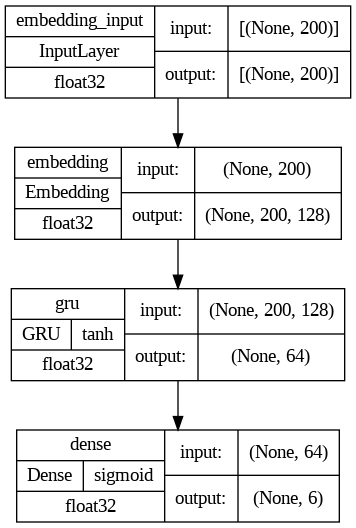

In [18]:
from keras.utils import plot_model
plot_model(model, show_dtype=True, show_shapes=True, show_layer_names=True, show_layer_activations=True)

Compile the model

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the model

In [86]:
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/3
3990/3990 [==============================] - 44s 11ms/step - loss: 0.0362 - accuracy: 0.9490 - val_loss: 0.0533 - val_accuracy: 0.9307
Epoch 2/3
3990/3990 [==============================] - 44s 11ms/step - loss: 0.0318 - accuracy: 0.9062 - val_loss: 0.0562 - val_accuracy: 0.9064
Epoch 3/3
3990/3990 [==============================] - 43s 11ms/step - loss: 0.0273 - accuracy: 0.8176 - val_loss: 0.0620 - val_accuracy: 0.8834


Predict on new data

In [87]:
new_comment = "You are the best person in the world"

In [88]:
#make predictions
new_comment = clean_text(new_comment)
new_comment_sequences = tokenizer.texts_to_sequences([new_comment])
new_comment_padded = pad_sequences(new_comment_sequences, maxlen=200)

In [89]:
# predict
predictions = model.predict(new_comment_padded)[0]

1/1 [==============================] - 0s 20ms/step


In [90]:
# what is the probablity of the event in every class
predictions

array([1.5764132e-01, 3.4483629e-03, 1.1259446e-01, 2.3402981e-04,
       6.6320783e-01, 1.0404676e-02], dtype=float32)

In [98]:
# print predictions for every class

for tox, pred in zip(toxicities, predictions):
    print(f"{tox}: {pred:.2f}")

i: 0.16


In [21]:
# from nltk import FreqDist
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

In [22]:
# text = ''
# for i in df['comment_text']:
#   text += i + ' '

In [27]:
# import nltk
# nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
tokens = word_tokenize(text)

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
swords = stopwords.words('english')

In [32]:
tokens1 = [token.lower() for token in tokens if token.lower() not in swords and (token.lower()).isalnum()]

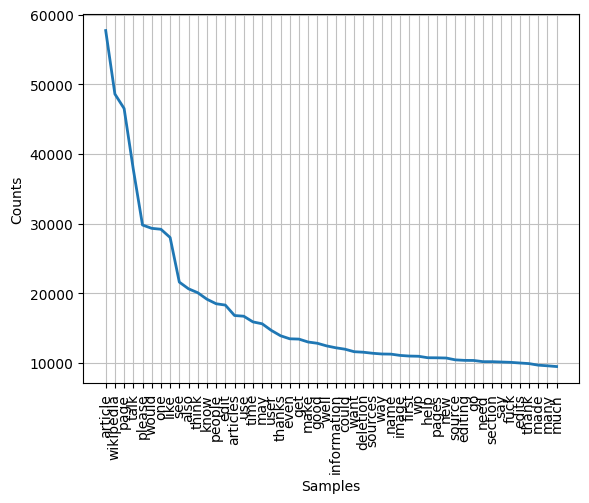

<Axes: xlabel='Samples', ylabel='Counts'>

In [37]:
freq = FreqDist(tokens1)
freq.plot(50)